In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

# Constants
g = 9.8  # gravity on Earth in m/s^2

# Generate synthetic data
def generate_data(num_samples=1000):
    m = np.random.uniform(1, 1000, num_samples)  # Mass in kg
    F = m * g  # Force (weight) in Newtons
    return m, F

# Generate training and testing data
m_train, F_train = generate_data(800)
m_test, F_test = generate_data(200)

# Reshape the data
m_train = m_train.reshape(-1, 1)  # TensorFlow expects input as (batch_size, num_features)
m_test = m_test.reshape(-1, 1)

# Build the model
model = models.Sequential([
    layers.Input(shape=(1,)), # Input layer
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for the force
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(m_train, F_train, epochs=50, batch_size=32, validation_data=(m_test, F_test))

# Evaluate the model
loss = model.evaluate(m_test, F_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(m_test)



Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 28237088.0000 - val_loss: 25907374.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21141270.0000 - val_loss: 18616218.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14619315.0000 - val_loss: 9219376.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6589910.5000 - val_loss: 1934993.1250
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1022638.3750 - val_loss: 22680.7656
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6498.6558 - val_loss: 8760.1318
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5113.0635 - val_loss: 32.9711
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.2731 - val_loss: 61.5405
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.1428 - val_loss: 7.0341
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4350 - val_loss: 6.8589
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6507 - val_loss: 6.904

# Plot it

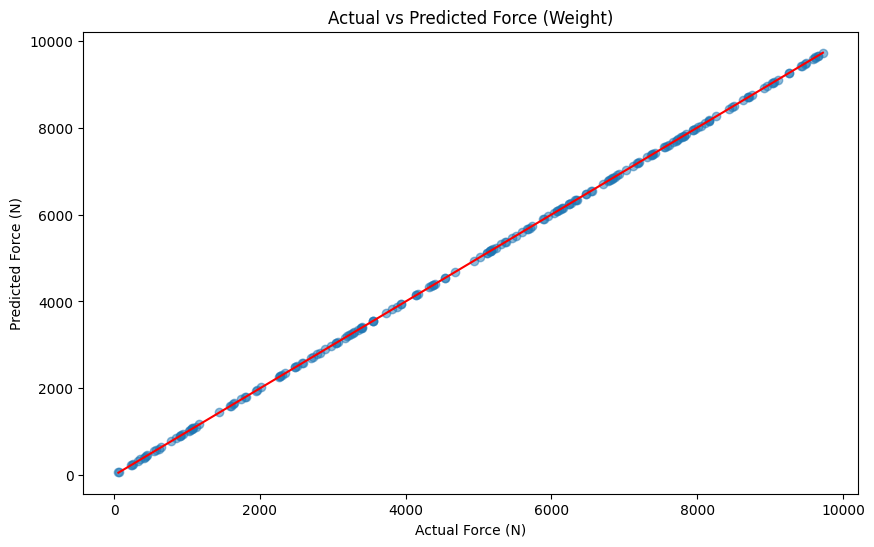

In [2]:

# Compare predictions to actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(F_test, predictions.flatten(), alpha=0.5)
plt.plot([min(F_test), max(F_test)], [min(F_test), max(F_test)], 'r')
plt.xlabel("Actual Force (N)")
plt.ylabel("Predicted Force (N)")
plt.title("Actual vs Predicted Force (Weight)")
plt.show()

In [3]:
# Create a Pandas DataFrame for the table
import pandas as pd

predictions_flat = predictions.flatten() # Flatten predictions before subtraction

# Calcola le differenze
differences =  F_test - predictions_flat

 # Flatten predictions to a 1D array
predictions = predictions.flatten()

df = pd.DataFrame({
    'Valori attesi': F_test,
    'Valore predetto': predictions,
    "Delta": differences     # Flatten differences as well
})

# Display the table
print(df)

     Valori attesi  Valore predetto     Delta
0      3394.110487      3396.523926 -2.413439
1      1599.521566      1603.400269 -3.878702
2      1803.578322      1807.290405 -3.712083
3      7368.509303      7367.678711  0.830593
4      7777.302498      7776.138184  1.164315
..             ...              ...       ...
195    3553.144232      3555.428223 -2.283991
196    9255.410633      9253.038086  2.372547
197    3069.234684      3071.913818 -2.679134
198    7199.910230      7199.217285  0.692945
199    2507.322756      2510.460449 -3.137693

[200 rows x 3 columns]


In [4]:
# Extract the learned weights and biases
weights, biases = model.layers[0].get_weights()

# Extract the learned gravitational constant (g) and bias
g_learned = weights[0][0]
b = biases[0]

# Print the learned equation
print(f"Learned equation: F = {g_learned} * m + {b}")

Learned equation: F = -0.24843043088912964 * m + 0.0
